In [12]:
from terminal_optimization import objects
from terminal_optimization import defaults
from terminal_optimization import system

# 0. Prepare inputs

## 0.1 Generate demand forecast scenario

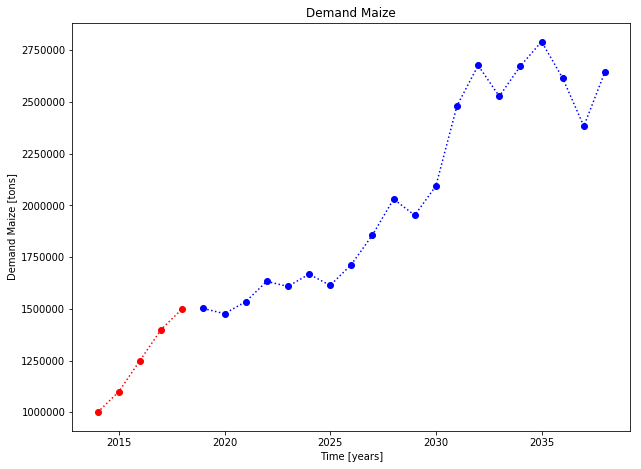

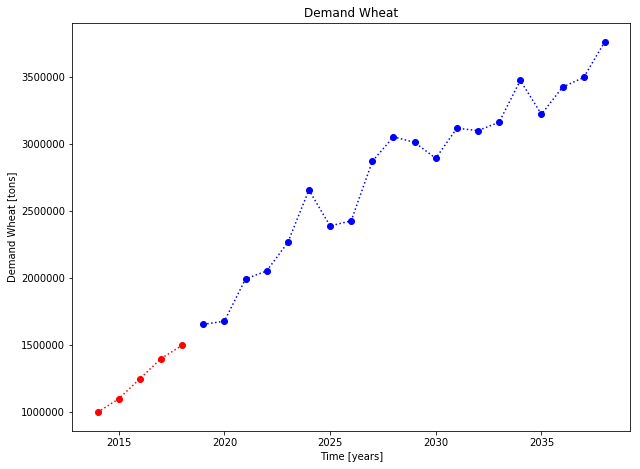

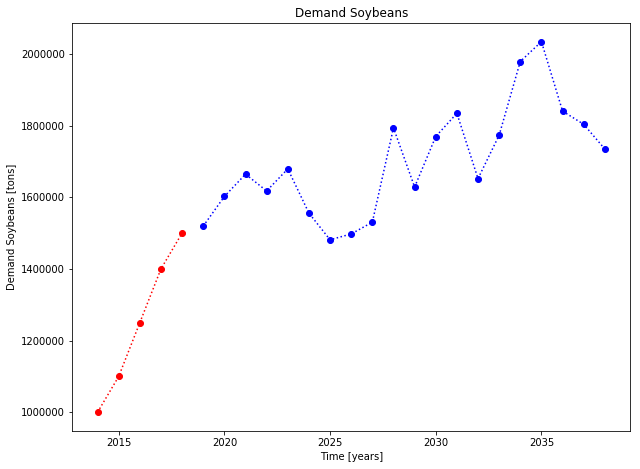

In [13]:
# instantiate a commodity object
maize = objects.Commodity(**defaults.maize_data)
wheat = objects.Commodity(**defaults.wheat_data)
soybeans = objects.Commodity(**defaults.soybean_data)

# create a future througput scenario
maize.scenario_random()
wheat.scenario_random()
soybeans.scenario_random()

demand = [maize, wheat, soybeans]

# plot scenarios 
if True:
    maize.plot_demand()
    wheat.plot_demand()
    soybeans.plot_demand()

## 0.2 Generate vessels

In [14]:
# instantiate vessels
handysize = objects.Vessel(**defaults.handysize_data)
handymax = objects.Vessel(**defaults.handymax_data)
panamax = objects.Vessel(**defaults.panamax_data)

vessels = [handysize, handymax, panamax]

# 1. Instatiate terminal system

In [15]:
# instantiate System object
Terminal = system.System(elements = demand + vessels)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [16]:
Terminal.simulate()


Simulate year: 2019
  Total vessel calls: 101
     Handysize calls: 44
     Handymax calls: 31
     Panamax calls: 26
  Total cargo volume: 4676872
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy (@ start of year): inf
  *** add Berth to elements
     Berth occupancy (after adding berth): inf
  *** add Quay to elements
     Berth occupancy (after adding quay): inf
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 5.64598687590491
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 2.8553652328242496
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 1.9251580184640291
  *** add Berth to elements
     Berth occupancy (after adding berth): 1.9251580184640291
  *** add Quay to elements
     Berth occupancy (after adding quay

  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 0.41673604613847876
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 0.40707842931203586
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 0.39800612259628654

Simulate year: 2035
  Total vessel calls: 168
     Handysize calls: 69
     Handymax calls: 49
     Panamax calls: 50
  Total cargo volume: 8049559
     a total of 11 Berth_01 is online; 11 total planned
     a total of 10 Quay_01 is online; 11 total planned
     a total of 30 Mobile_crane_01 is online; 33 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy (@ start of year): 0.394821693182349

Simulate year: 2036
  Total vessel calls: 162
     Handysize calls: 64
     Handymax calls: 45
     Panamax calls: 53
  Total cargo volume: 7881452
     a total of 11 Berth_01 is online; 11 total planned
     a total of 11 Quay_01 is online; 11 total pla

## Report all elements

In [17]:
for element in Terminal.elements:
    print("")
    print(element.name)
    print("")
    print(element.__dict__)


Maize

{'historic_data':    year   volume
0  2014  1000000
1  2015  1100000
2  2016  1250000
3  2017  1400000
4  2018  1500000, 'scenario_data':     year   volume
0   2019  1501656
1   2020  1476527
2   2021  1534480
3   2022  1632823
4   2023  1608268
5   2024  1667713
6   2025  1613254
7   2026  1714211
8   2027  1856853
9   2028  2030547
10  2029  1952326
11  2030  2093777
12  2031  2481833
13  2032  2676689
14  2033  2527403
15  2034  2673976
16  2035  2791778
17  2036  2615092
18  2037  2382942
19  2038  2645438, 'handling_fee': 3, 'handysize_perc': 50, 'handymax_perc': 50, 'panamax_perc': 0, 'name': 'Maize', 'id': '282d5012-4b56-11e9-9120-60f677ba2ce0'}

Wheat

{'historic_data':    year   volume
0  2014  1000000
1  2015  1100000
2  2016  1250000
3  2017  1400000
4  2018  1500000, 'scenario_data':     year   volume
0   2019  1655882
1   2020  1679614
2   2021  1995207
3   2022  2054308
4   2023  2267024
5   2024  2658394
6   2025  2390386
7   2026  2428727
8   2027  2872356
9   2

19  2038        0.0    118536.25    38237.5  725400.0  180900.0}

Berth_01

{'triggers': [], 'renevue': [], 'labour': [], 'maintenance': [], 'energy': [], 'insurance': [], 'lease': [], 'demurrage': [], 'residual': [], 'capex': [], 'crane_type': 'Mobile cranes', 'max_cranes': 3, 'delivery_time': 1, 'year_purchase': [], 'year_online': 2035, 'name': 'Berth_01', 'id': '2968a37a-4b56-11e9-a357-60f677ba2ce0'}

Quay_01

{'triggers': [], 'renevue': [], 'labour': [], 'maintenance': 185627.2, 'energy': [], 'insurance': 185627.2, 'lease': [], 'demurrage': [], 'residual': [], 'capex': 18562720, 'year_purchase': [], 'year_online': 2036, 'ownership': 'Port authority', 'delivery_time': 2, 'lifespan': 50, 'mobilisation_min': 2500000, 'mobilisation_perc': 0.02, 'maintenance_perc': 0.01, 'insurance_perc': 0.01, 'length': 400, 'depth': 14, 'freeboard': 4, 'Gijt_constant': 757.2, 'Gijt_coefficient': 1.2878, 'unit_rate': 65696, 'name': 'Quay_01', 'id': '2968a37b-4b56-11e9-97f0-60f677ba2ce0', 'df':     year

In [18]:
cash_flows = Terminal.add_cashflow_elements()

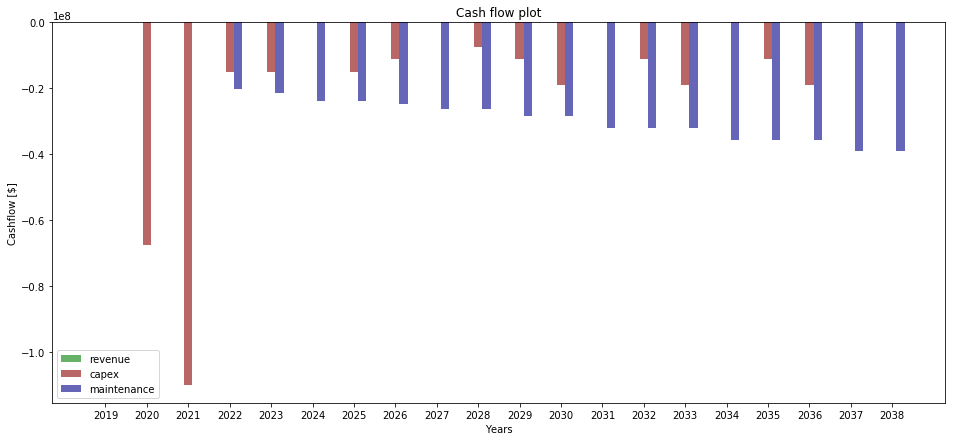

In [19]:
Terminal.cashflow_plot(cash_flows)

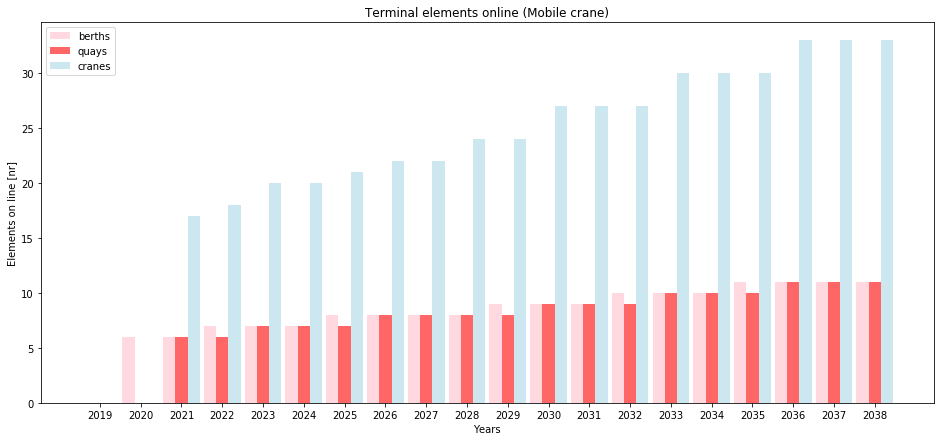

In [20]:
Terminal.terminal_elements_plot()

## Add a supply chain graph
The graph should be useable to detect if all elements of the supplychain are in place. 
Only when a path through the supply chain is available can revenue be obtained. 
This is still an experimental functionality and not yet fully implemented. 

In [21]:
# *** specify supply chain logic
# 1. create object types
quay = objects.Quay_wall(**defaults.quay_wall_data)
berth = objects.Berth(**defaults.berth_data)
crane = objects.Cyclic_Unloader(**defaults.gantry_crane_data)
screw = objects.Continuous_Unloader(**defaults.continuous_screw_data)
conveyor1 = objects.Conveyor(**defaults.quay_conveyor_data)
storage = objects.Storage(**defaults.silo_data)
conveyor2 = objects.Conveyor(**defaults.hinterland_conveyor_data)
unloading_station = objects.Unloading_station(**defaults.hinterland_station_data)

# 2. specify nodes and edges
nodes = [quay, berth, crane, screw, conveyor1, storage, conveyor2, unloading_station]
edges = [[quay, berth],
         [berth, crane],
         [crane, screw],
         [screw, conveyor1],
         [conveyor1, storage],
         [storage, conveyor2],
         [conveyor2, unloading_station]]

# 3. invoke the supply_chain method
Terminal.supply_chain(nodes, edges)

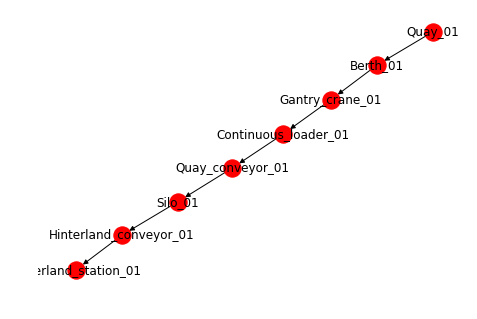

In [22]:
Terminal.plot_system()